## Extraction of fatures and Forming structure from unstructured Data

* Zero Crossing Rate
* Spectral Rolloff
* Spectral Centroid
* Chroma Frequencies
* Mel-Frequency Cepstral Coefficients

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import librosa
import librosa.display

import random

import warnings
warnings.filterwarnings('ignore')


audio_fpath = "../Data/genres_original/"
audio_genres = os.listdir(audio_fpath)
audio_genres.remove(".DS_Store")

audio_clips = []
for genre in audio_genres:
    for file in (os.listdir(audio_fpath+""+genre)):
        audio_clips.append(audio_fpath+""+genre+"/"+file)
        
print(audio_genres)
print("Number of files = ",len(audio_clips))

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
Number of files =  999


### Zero Crossing Rate

3

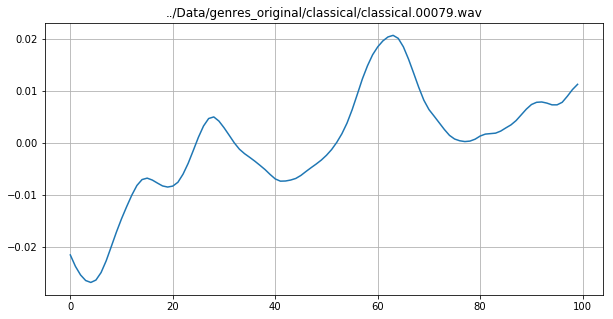

In [2]:
x, sr = librosa.load(audio_clips[500])
start = 500
end = 600
plt.figure(figsize=(10, 5))
plt.title(audio_clips[500])
plt.grid()
plt.plot(x[start:end])
zero_crossing = librosa.zero_crossings(x[start:end], pad=False)
sum(zero_crossing)

### Spectral Centroid

(1293,)


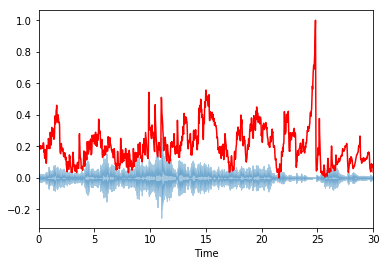

In [3]:
spec_cent = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spec_cent.shape)
frames = range(len(spec_cent))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spec_cent), color='r')

### Spectral Rolloff

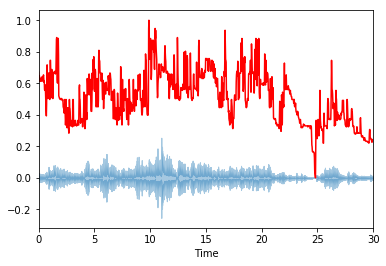

In [4]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Chroma Frequencies

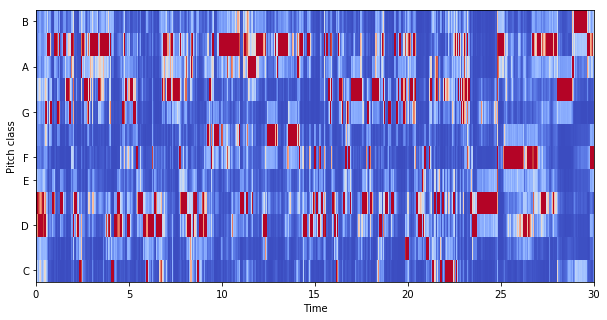

In [5]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

### MFCCs

(20, 1293)


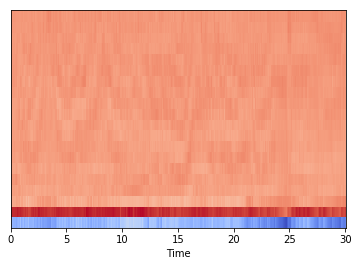

In [6]:
mfcc = librosa.feature.mfcc(x, sr=44100)
print(mfcc.shape)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

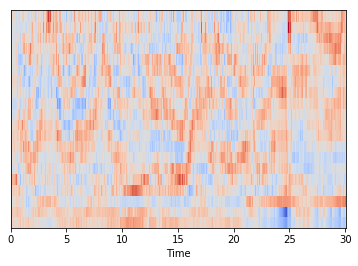

In [7]:
mfccs = preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Save Data For All Files in DB

In [16]:
import time
count, m = 0, {}

m["names"], m["chroma"], m["spec_cnt"], m["spec_bw"], m["roll_off"] = [], [], [], [], []
m["zcr"] = []

for i in range(20):
    m["mfcc_"+str(i)] = []

m["labels"] = []
start = time.time()

for song in audio_clips:
    x, sr = librosa.load(song, mono=True, duration=30)
    m["chroma"].append(np.mean(librosa.feature.chroma_stft(y=x, sr=sr)))
    m["spec_cnt"].append(np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)))
    m["spec_bw"].append(np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr)))
    m["roll_off"].append(np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr)))
    m["zcr"].append(np.mean(librosa.feature.zero_crossing_rate(x)))
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    c = 0
    for e in mfcc:
        m["mfcc_"+str(c)].append(np.mean(e))
        c += 1
    m["names"].append(song.split("/")[4])
    m["labels"].append(song.split("/")[3])
    count += 1
    if count % 20 == 0:
        print(str(count)+" Songs Done!")

print("Extracted Data From All Files...")
    
import pandas as pd
dataFrame = pd.DataFrame(data=m, columns= sorted(list(m.keys()), reverse = True))
end = time.time()
print("Time Taken: "+(str(end - start))+" seconds")


20 Songs Done!
40 Songs Done!
60 Songs Done!
80 Songs Done!
100 Songs Done!
120 Songs Done!
140 Songs Done!
160 Songs Done!
180 Songs Done!
200 Songs Done!
220 Songs Done!
240 Songs Done!
260 Songs Done!
280 Songs Done!
300 Songs Done!
320 Songs Done!
340 Songs Done!
360 Songs Done!
380 Songs Done!
400 Songs Done!
420 Songs Done!
440 Songs Done!
460 Songs Done!
480 Songs Done!
500 Songs Done!
520 Songs Done!
540 Songs Done!
560 Songs Done!
580 Songs Done!
600 Songs Done!
620 Songs Done!
640 Songs Done!
660 Songs Done!
680 Songs Done!
700 Songs Done!
720 Songs Done!
740 Songs Done!
760 Songs Done!
780 Songs Done!
800 Songs Done!
820 Songs Done!
840 Songs Done!
860 Songs Done!
880 Songs Done!
900 Songs Done!
920 Songs Done!
940 Songs Done!
960 Songs Done!
980 Songs Done!
Extracted Data From All Files...
Time Taken: 265.27385687828064 seconds


In [17]:
dataFrame.head()

,zcr,spec_cnt,spec_bw,roll_off,names,mfcc_9,mfcc_8,mfcc_7,mfcc_6,mfcc_5,...,mfcc_15,mfcc_14,mfcc_13,mfcc_12,mfcc_11,mfcc_10,mfcc_1,mfcc_0,labels,chroma
0,0.101915,2682.727340,2924.215041,5957.305644,pop.00027.wav,3.363038,5.728664,-0.398120,5.277308,7.404654,...,-3.783234,-1.270527,-5.902046,-1.841913,-4.229316,-2.523778,83.335220,-75.340881,pop,0.377454
1,0.137063,2835.031945,2731.743815,5944.989051,pop.00033.wav,2.875912,2.522769,-0.084578,3.164009,12.719352,...,-0.411383,0.936584,1.085335,1.609468,-3.026064,-1.671819,73.770790,-68.972328,pop,0.422917
2,0.228737,4225.662023,3404.260172,8483.157037,pop.00032.wav,0.291262,3.456910,0.084071,3.028750,0.607630,...,-1.407112,0.222327,-0.767989,2.896105,1.256652,0.616375,41.587727,-113.141205,pop,0.426655
3,0.103542,2525.971548,2848.668079,5554.558079,pop.00026.wav,4.925743,0.998751,-5.546153,0.749484,4.876618,...,-2.382944,-0.159194,-3.043840,-0.026356,-4.917739,-5.829502,97.464462,-73.339767,pop,0.334941
4,0.148740,3070.583251,2975.861836,6652.934771,pop.00030.wav,-0.179873,0.647843,-0.342443,-1.322754,-0.917457,...,-3.441155,1.754881,1.247870,2.520512,-1.056774,-1.216198,72.297020,-18.141941,pop,0.357725


In [18]:
dataFrame.to_csv("../Data/preparedData.csv", index=False)